# Demo: Considering an easy regression task using the JGepRegression
# Here we start by installing the Julia kernel - this may take a few moments 😴

In [13]:
%%shell
set +e

#---------------------------------------------------#
JULIA_VERSION="1.10.5" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools CSV DataFrames Plots Dates DynamicExpressions FileIO ForwardDiff GZip JSON LineSearches LinearAlgebra Logging Optim OrderedCollections ProgressMeter Random Serialization StaticArrays Statistics Zygote"
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  if ! wget -nv $URL -O /tmp/julia.tar.gz; then
    echo "Failed to download Julia. Check the URL and your internet connection."
    exit 1
  fi

  if ! tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1; then
    echo "Failed to extract Julia archive. Check if you have sufficient permissions."
    exit 1
  fi

  rm /tmp/julia.tar.gz

  # Install packages
  echo "Installing packages..."
  if ! julia -e "using Pkg; Pkg.add([$(echo $JULIA_PACKAGES | sed "s/ /\", \"/g" | sed "s/^/\"/; s/$/\"/")]); Pkg.precompile()"; then
    echo "Failed to install some packages. Please check the output for details."
  fi

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  if ! julia -e 'using Pkg; Pkg.add("IJulia"); using IJulia; IJulia.installkernel("julia", env=Dict("JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'; then
    echo "Failed to install IJulia kernel. Check your internet connection and try again."
    exit 1
  fi

  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  if ! mv -f $KERNEL_NAME "$KERNEL_DIR"/julia; then
    echo "Failed to rename kernel. Check if you have sufficient permissions."
    exit 1
  fi

  echo ''
  echo "Successfully installed Julia $JULIA_VERSION with the specified packages!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "select 'Julia' from the kernel dropdown menu to start using Julia."
else
  echo "Julia is already installed. Version: `julia -v`"
  echo "Updating packages..."
  if ! julia -e "using Pkg; Pkg.add([$(echo $JULIA_PACKAGES | sed "s/ /\", \"/g" | sed "s/^/\"/; s/$/\"/")]); Pkg.update(); Pkg.precompile()"; then
    echo "Failed to update some packages. Please check the output for details."
  fi
fi

## After that, go to the right corner (small threefold pointing downwards) and change the runtime type to the julia kernel

## In the nextline we just make sure that we have installed it

In [1]:
versioninfo()

Julia Version 1.11.5
Commit 760b2e5b739 (2025-04-14 06:53 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 12 × 12th Gen Intel(R) Core(TM) i7-1265U
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 (ORCJIT, alderlake)
Threads: 8 default, 0 interactive, 4 GC (on 12 virtual cores)
Environment:
  JULIA_NUM_THREADS = 8


In [2]:
# We install the package: - takes another minute :(
using Pkg
using Random
Pkg.add(url="https://github.com/maxreiss123/GeneExpressionProgramming.jl.git")

    Updating git-repo `https://github.com/maxreiss123/GeneExpressionProgramming.jl.git`
   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [2f0a5bb0] ~ GeneExpressionProgramming v0.3.4 `~/.julia/dev/GeneExpressionProgramming` ⇒ v0.5.0 `https://github.com/maxreiss123/GeneExpressionProgramming.jl.git#master`
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [2f0a5bb0] ~ GeneExpressionProgramming v0.3.4 `~/.julia/dev/GeneExpressionProgramming` ⇒ v0.5.0 `https://github.com/maxreiss123/GeneExpressionProgramming.jl.git#master`
Precompiling project...
   6076.8 ms  ✓ GeneExpressionProgramming
  1 dependency successfully precompiled in 8 seconds. 498 already precompiled.


In [4]:
#Then we import everthing we need - add further libs if you would like to plot the result
using GeneExpressionProgramming

## We now define the data according to a function:

$$
y = x_1^2 + 0.5 x_1x_2-2x_2^2
$$

In [5]:
#Generate some data
x_data = randn(Float64, 2, 1000);
y_data = @. x_data[1,:] * x_data[1,:] + x_data[1,:] * x_data[2,:] - 2 * x_data[2,:] * x_data[2,:];


x_test = randn(Float64, 2, 1000);
y_test = @. x_data[1,:] * x_data[1,:] + x_data[1,:] * x_data[2,:] - 2 * x_data[2,:] * x_data[2,:];



In [6]:
#Setting number of individuals
population_size = 1000
#Setting number of epochs
epochs = 1000

1000

In [13]:
#define the 
number_features = 2
regressor = GepRegressor(number_features)

fit!(regressor, epochs, population_size, x_data, y_data; loss_fun="mse")

pred = regressor(x_data)

@show regressor.best_models_[1].compiled_function
@show regressor.best_models_[1].fitness

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter ~/.julia/packages/ProgressMeter/kniaW/src/ProgressMeter.jl:607
Training: 100%|███████████████████████████| Time: 0:00:11 (11.59 ms/it)
                 epoch_: 1000
   duplicates_per_epoch: 82
             train_loss: 0.000000e+00
        validation_loss: 0.000000e+00


(regressor.best_models_[1]).compiled_function = (x2 * ((x1 - x1) + ((0.0 - x2) - x2))) + (((x1 * x1) + (x2 * x1)) + 0.0)
(regressor.best_models_[1]).fitness = (0.0,)


(0.0,)

# Creating a view nice Plots

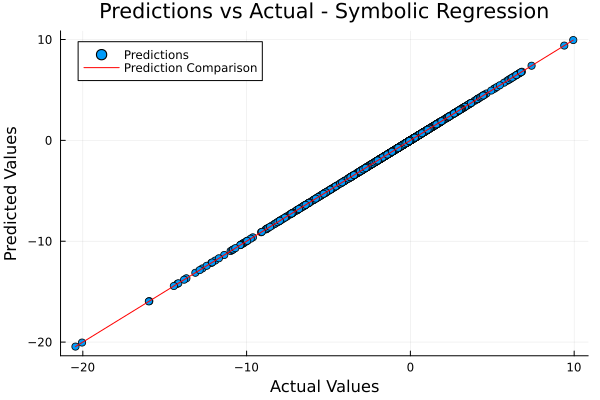

In [19]:
using Plots
#Making a nice plot - data vs
pred_vs_actual = scatter(vec(pred), vec(y_test),
    xlabel="Actual Values",
    ylabel="Predicted Values",
    label="Predictions ",
    title="Predictions vs Actual - Symbolic Regression");


plot!(pred_vs_actual, vec(y_test), vec(y_test),
    label="Prediction Comparison",
    color=:red)

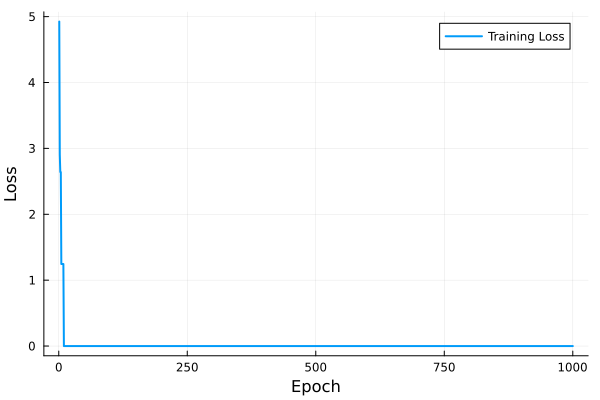

In [27]:
#train loss vs validation loss
fitness_hist_numbers = [elem[1] for elem in regressor.fitness_history_.train_loss]

train_validation = plot(
    fitness_hist_numbers,
    label="Training Loss",
    ylabel="Loss",
    xlabel="Epoch",
    linewidth=2
)